# 4. DIFFUSIONE - *OPINION DYNAMIC*

Nella seguente sezione si studierà il fenomeno della diffusione delle opinioni applicando i seguenti **algoritmi di diffusione delle opinioni** utilizzando la libreria [**NDlib**](https://ndlib.readthedocs.io/en/latest/#), sia alla rete realer che al grafo completo della rete stessa

- [**Voter** ](#voter)
- [**Majority Rule**](#MajRule)
- [**Sznajd**](#Sznajd)
- [**Q-Voter**](#QVoter)




In [1]:
! pip install ndlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

from ndlib import viz
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

Carico la rete

In [3]:
def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[1], l[3], weight=int(float(l[5].rstrip('\n'))))
    return g

In [4]:
df = pd.read_csv('../data_collection/data/df_grafo_pesato.csv')
g = read_net("../data_collection/data/df_grafo_pesato.csv")

In [5]:
#rimuovo self-loop
g.remove_edges_from(nx.selfloop_edges(g))

In [6]:
nx.info(g)

'Graph with 18246 nodes and 21630 edges'

In [7]:
g

## Grafo completo 
Creo il grafo completo utilizzando le componenti connesse del grafo (???)

In [8]:
comps_g = list(nx.connected_components(g.to_undirected())) 
print ("- Componenti connesse RETE REALE:", len(comps_g))
big_comp_g = len(comps_g[0])
print ('- Componente maaggiore:', big_comp_g)

- Componenti connesse RETE REALE: 2408
- Componente maaggiore: 11974


In [9]:
list(comps_g[0])

['bethjones36',
 'dineshm',
 'thatcurious_cat',
 'gianniceddu',
 'renegade98',
 'yummyyet',
 'PureRuns',
 'bootstinker',
 'dlrtybombs',
 'dccc68',
 'ryan_barb',
 'cat_a_estranha',
 'addobboart',
 'lbcnews',
 'zach_vasquez',
 'dancescatharsis',
 '43Cyoa',
 'MoazaAlSharif',
 '1crazeeturtle',
 'adrienne88888',
 'antigone',
 'thatumbrelaguy',
 'crouchiedotnet',
 'papisharx',
 'GuarachoVictor1',
 'cfold2',
 'lbaguiar19',
 'SimoneDawkins82',
 'tbipr1nce55',
 'tildabeau',
 'mikey_styles',
 'TheChurchOfDepp',
 'sashtlfc',
 'lunaslifeart',
 'popcornplanet',
 'roslyn715',
 'Alan__Turing_',
 'vintagegirl1963',
 'dlordepp',
 'cakennedy6',
 'ChapStick',
 'JonnnySpinster',
 'charmgurl',
 'the_dailywire',
 'stephanieriou',
 'SmallScreenCo',
 'toothfairylala',
 'erin_gutillo',
 'cptvtd_gg',
 'c0ttt0n',
 'tbimedia',
 'Gilgamesh922',
 'previatarago',
 'controversialog',
 'CarolAllred8',
 'Rickstroik',
 'kabalqabalcabal',
 'JasonLahme',
 'lucyannagray',
 'libhalps',
 'ForVictoRi_VVIP',
 'newyorkpost',
 '

In [10]:
g = g.subgraph(comps_g[0])

In [11]:
g

In [12]:
len(comps_g[0])

11974

In [13]:
g_complete = nx.complete_graph(11974) #creo un grafo completo con la big component

In [14]:
g_complete

---

## Voter <a id = 'voter'> </a>

#### Grafo reale

In [15]:
# Configurazione
model = op.VoterModel(g, seed = 1)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200) #max_it = 75 (?)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

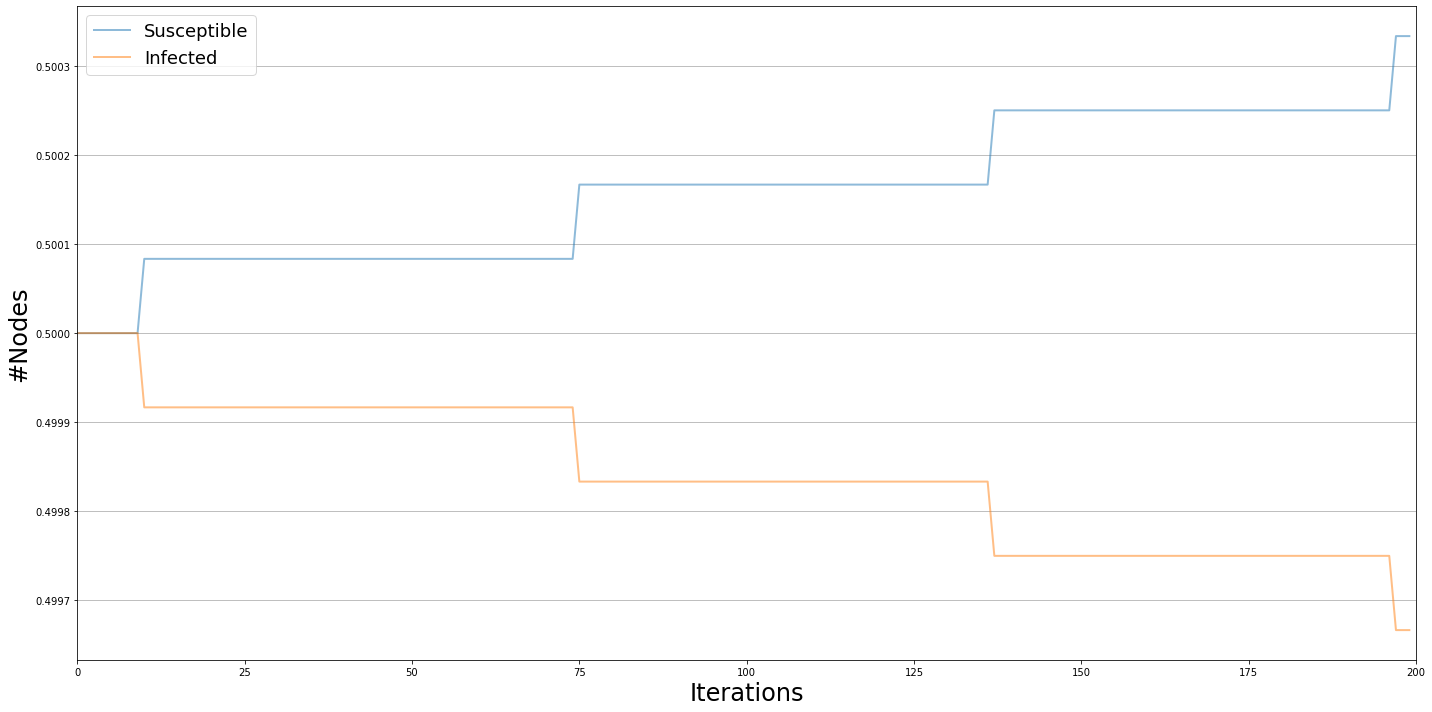

In [31]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Voter.png')
viz.plot()

#### Grafo completo

In [17]:
# Configurazione 
model = op.VoterModel(g_complete, seed = 1)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

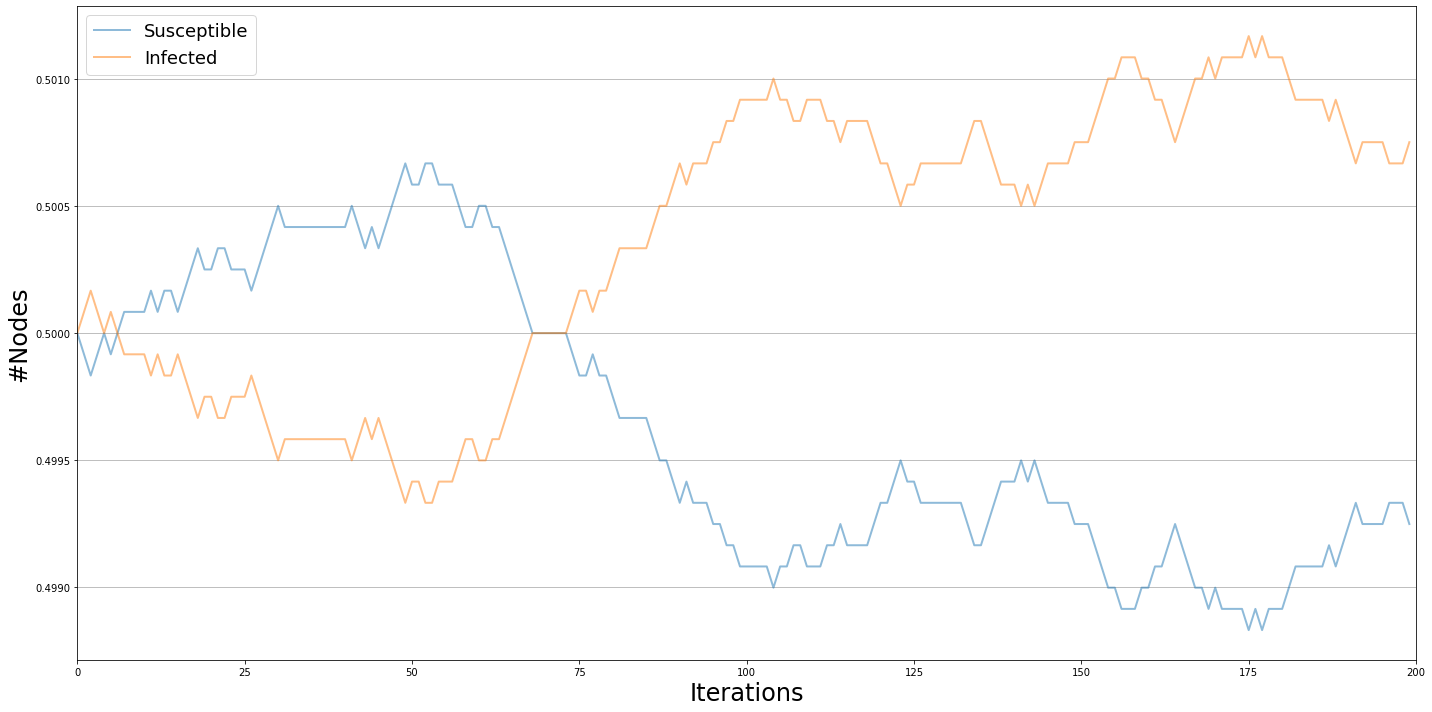

In [18]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Voter_complete.png')
viz.plot()

---


## Majority Rule <a id = 'MajRule'> </a>


#### Grafo reale

In [19]:
# Configurazione 
model = op.MajorityRuleModel(g, seed = 1)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

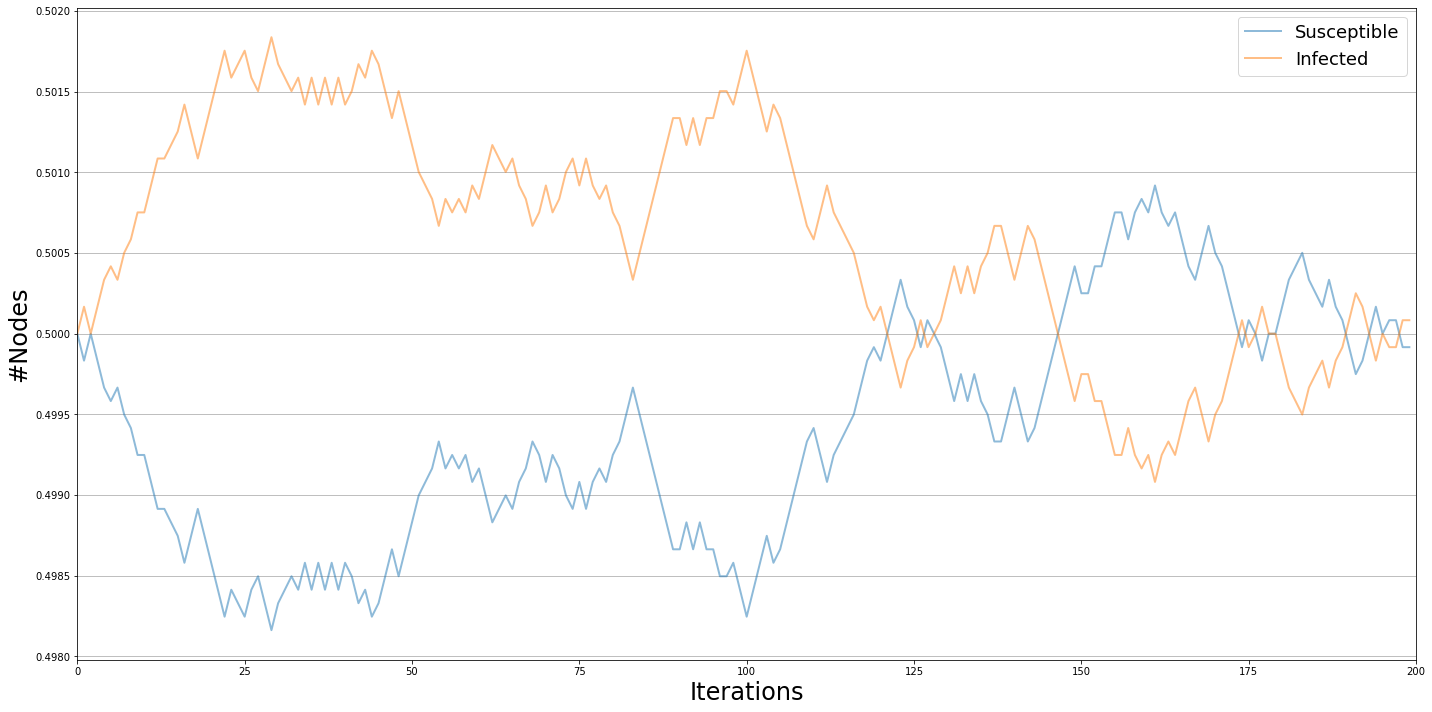

In [20]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/MajorityRule.png')
viz.plot()

---

#### Grafo completo

In [21]:
# Configurazione
model = op.MajorityRuleModel(g_complete, seed = 1)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

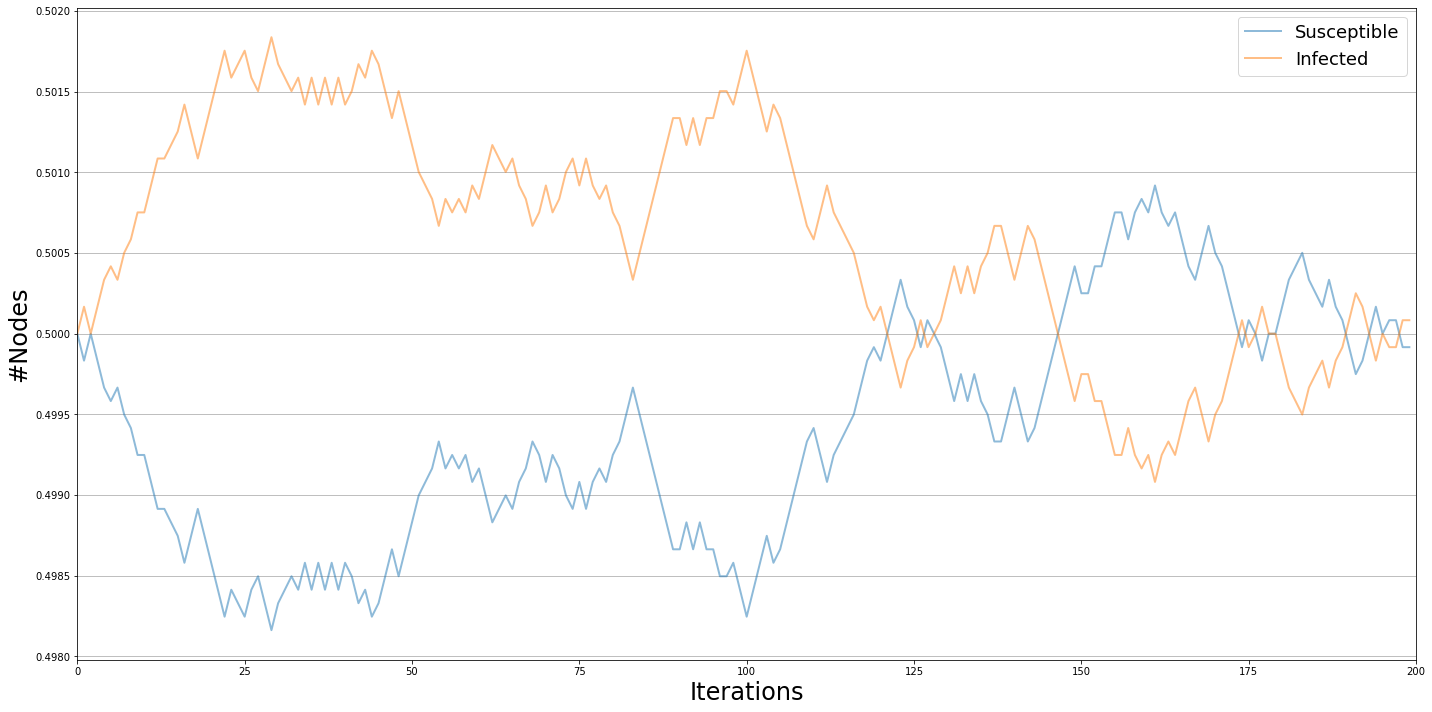

In [22]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/MajorityRule_complete.png')
viz.plot()

---

## Sznajd  <a id = 'Sznajd'> </a> 


#### Rete Reale

In [43]:
# Configurazione 
model = op.SznajdModel(g, seed = 1)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.2)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200) #max_it = 75 (?)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

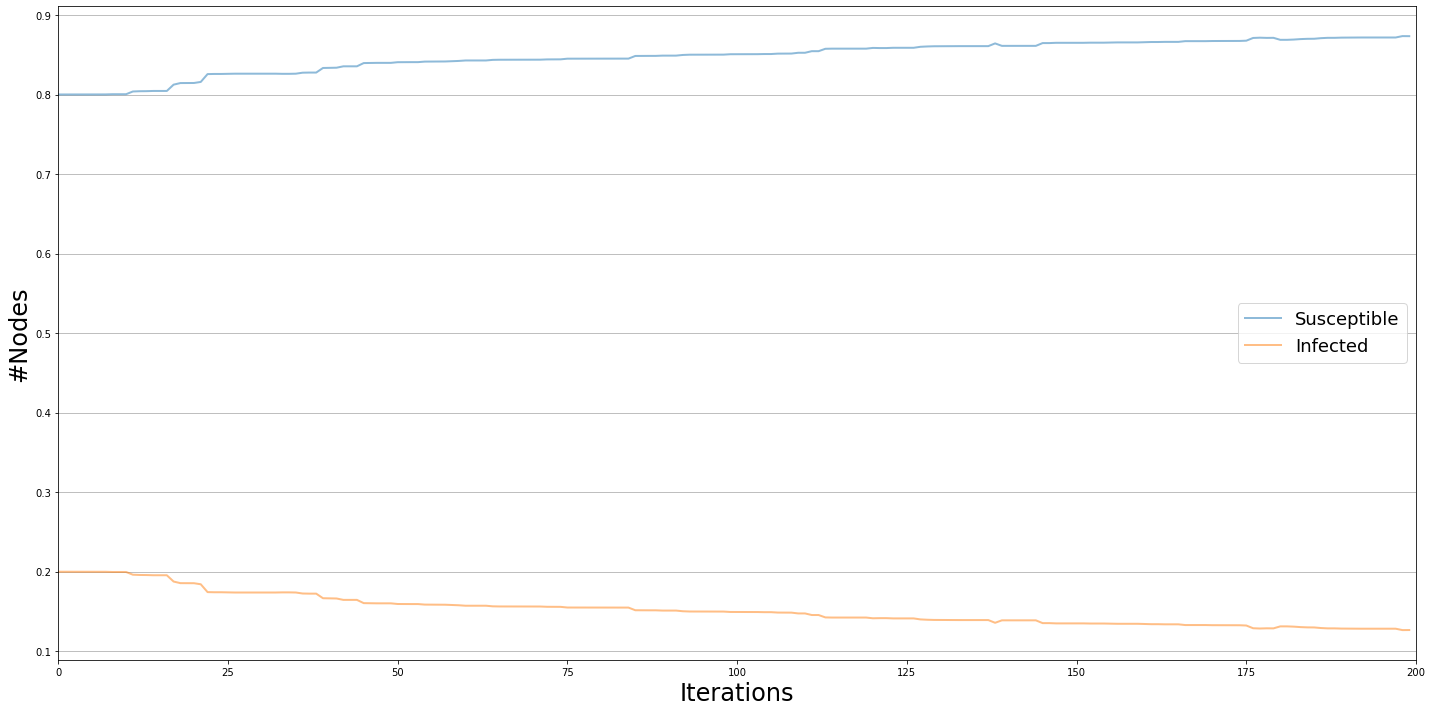

In [44]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Sznaj.png')
viz.plot() #polarizzazione totale 

#### Grafo completo

In [25]:
# Configurazione 
model = op.SznajdModel(g_complete, seed = 1)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

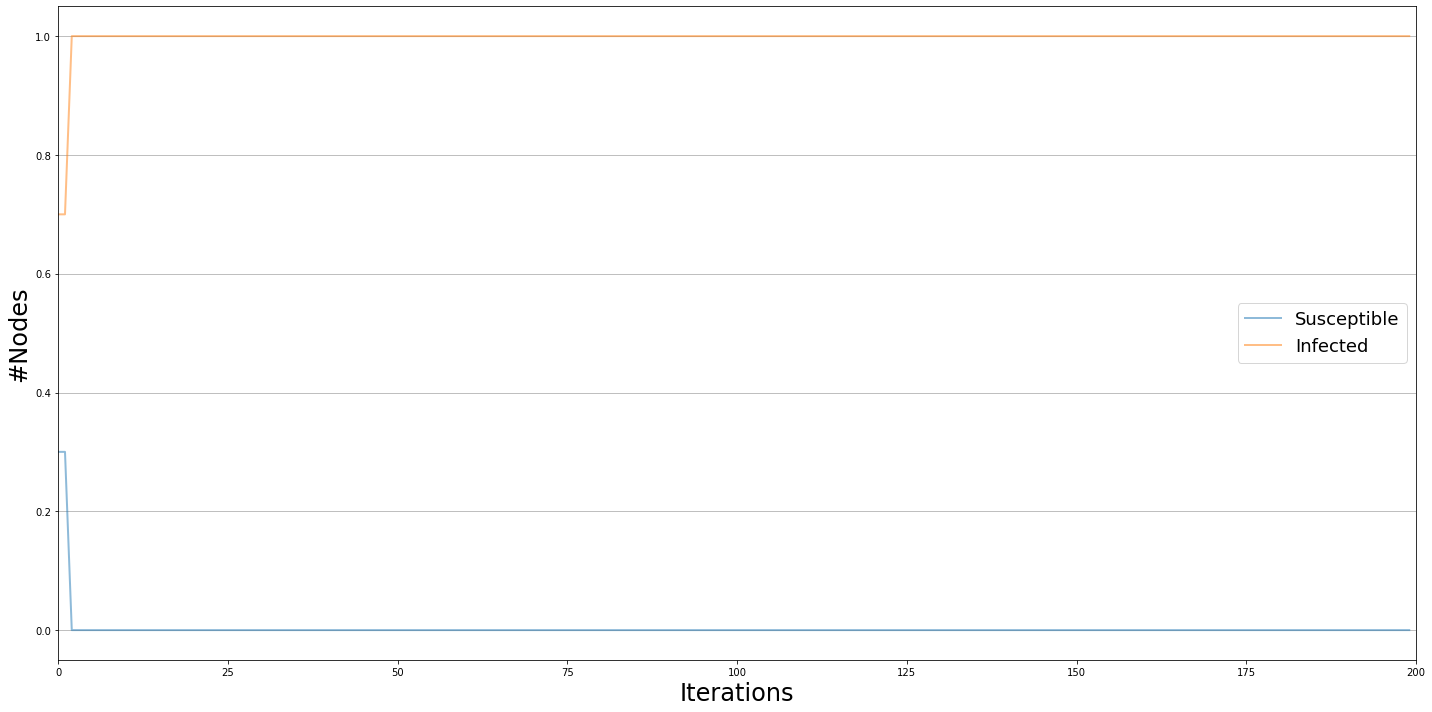

In [26]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Sznaj_complete.png')
viz.plot() #polarizzazione totale

---

## Q-Voter <a id = 'QVoter'> </a>


#### Rete Reale

In [27]:
# Configurazione
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

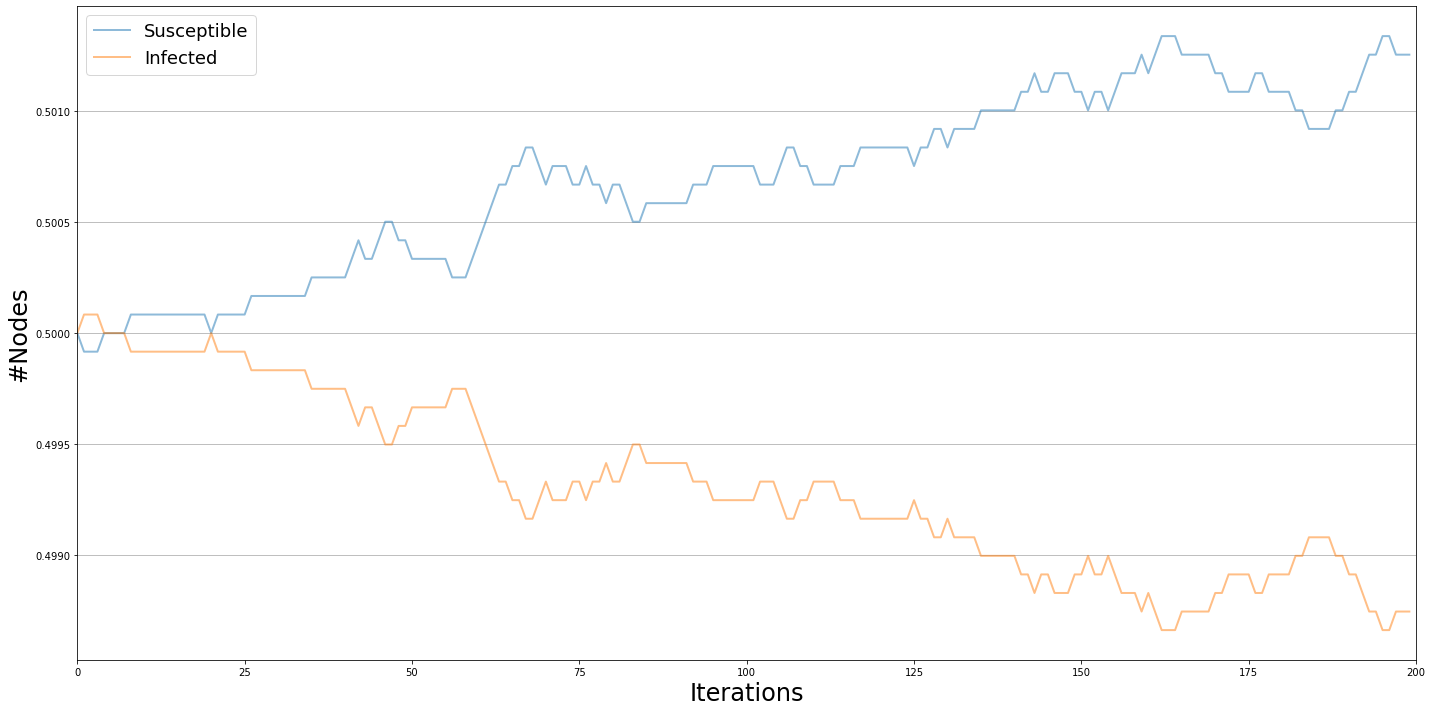

In [28]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Qvoter.png')
viz.plot()

#### Rete Completa 

In [29]:
# Configurazione
model = op.QVoterModel(g_complete, seed = 1)
config = mc.Configuration()
config.add_model_parameter("q", 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Esecuzione
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

<Figure size 1440x720 with 0 Axes>

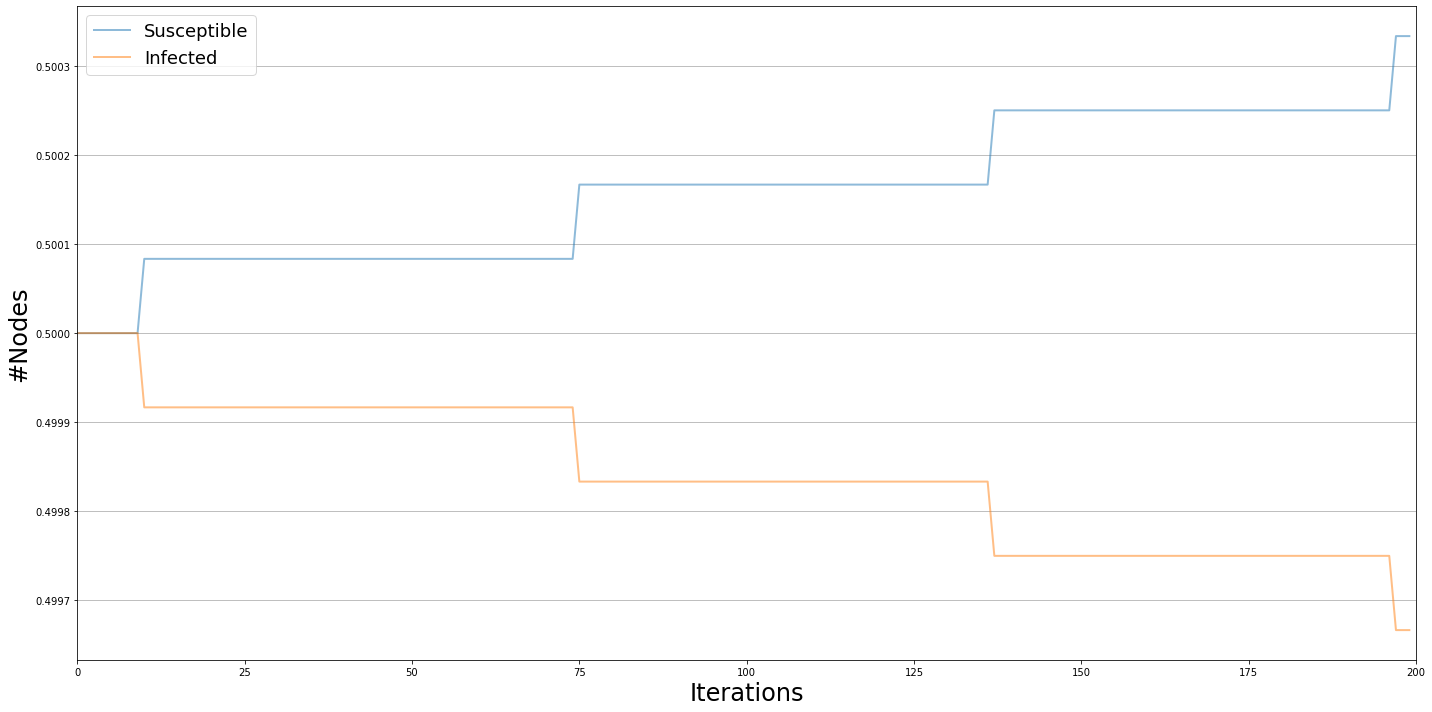

In [30]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot('plots/Diffusione/Qvoter_complete.png')
viz.plot()